<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Discriptive_statistics_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Discriptive statistics

1. data and datatypes

2. measure of central tendency

3. measure of dispersion

4. Quartiles

5. measure of skewness and kurtosis


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

In [ ]:
data=np.arange(20)
data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

##Measure of central tendency

In [ ]:
print("mean of the data : ",np.mean(data))
print("median of the data : ",np.median(data))
print("mode of the data : ",stats.mode(data))

mean of the data :  9.5
median of the data :  9.5
mode of the data :  ModeResult(mode=array([0]), count=array([1]))


##Measure of dispersion

In [ ]:
print("variance : ",data.var())
print("standard deviation : ",data.std())

import statistics as stat
print("variance : ",stat.variance(data))
print("standard deviation : ",stat.stdev(data))

variance :  33.25
standard deviation :  5.766281297335398
variance :  35
standard deviation :  5.916079783099616


##Quartile

In [ ]:
import seaborn as sns

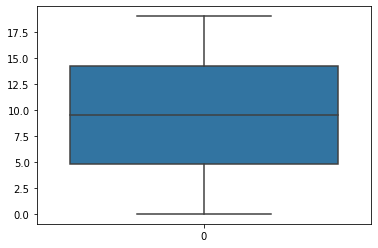

In [ ]:
sns.boxplot(data=data)

# max-- maximum value in data

# q3-- 75% quartile
# q2-- 50% quartile
# q1-- 25% quartile

# min-- minimum value in data

In [ ]:
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


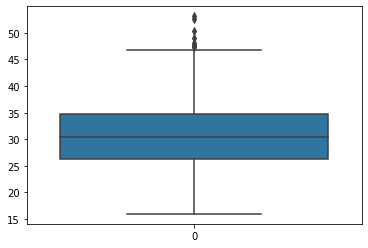

In [ ]:
sns.boxplot(data=df['bmi'])

In [ ]:
print("min : ",df['bmi'].quantile(0))        #min
print("Q1 : ",df['bmi'].quantile(0.25))     #25 % values below Q1
print("Q2 : ",df['bmi'].quantile(0.50))     #50 % values below Q2-- median
print("Q3 : ",df['bmi'].quantile(0.75))     #75% values below Q3
print("max : ",df['bmi'].quantile(1))       #max


min :  15.96
Q1 :  26.29625
Q2 :  30.4
Q3 :  34.69375
max :  53.13


In [ ]:
Q1=df['bmi'].quantile(0.25)
Q3=df['bmi'].quantile(0.75)
IQR=Q3-Q1

upper_limit=Q3-1.5*IQR
lower_limit=Q1-1.5*IQR

In [ ]:
df=df[(df['bmi']<upper_limit)&(df['bmi']>lower_limit)]
df.head()

,age,sex,bmi,children,smoker,region,charges
28,23,male,17.385,1,no,northwest,2775.19215
35,19,male,20.425,0,no,northwest,1625.43375
37,26,male,20.800,0,no,southwest,2302.30000
42,41,male,21.780,1,no,southeast,6272.47720
98,56,male,19.950,0,yes,northeast,22412.64850


##Skewness and kurtosis


skewness is measure of symmetry or asymmentry of data distribution.

    symmetrical distribution :
      tail on both sides are similer to curve.
      mean = median = mode
      skewness is zero.
    
    positive or right skewness :
      tail on the right side of the curve is bigger than left tail.
      mean > median > mode
      skewness is positive

    negative or left skewness :
      tail on the left side of the curve is  bigger than right tail.
      mean < median < mode
      skewness is negative

skewness = 3(mean-median)/std

skewness = df.skew()

In [ ]:
print(df.skew())

age         0.523305
bmi        -0.676137
children    0.963695
charges     0.885057
dtype: float64


kurtosis is the measure of the normally distributed data to check whether heavily tailed or lightly tailed

    ku = Q / (P90-P10)
    Q = quartile division
    P90 = 90th percentile
    P10 = 10th percentile

Types of kurtosis :

    mesokurtic : 
      normally distributed data.
      kurtosis = 0
      no outliers
    leptokurtic : 
      heavy tailed data
      kurtosis > 0
      presence of outliers
    platykurtic :
      lightly tailed data
      kurtosis < 0
      no outliers as maximum points are present in high proximity with mean 



In [ ]:
print(df.kurtosis())
print(df.kurt())

age        -0.929773
bmi        -0.573289
children    0.430597
charges     0.700597
dtype: float64
age        -0.929773
bmi        -0.573289
children    0.430597
charges     0.700597
dtype: float64


In [ ]:
mean=np.mean(df['bmi'])
median=np.median(df['bmi'])
mode=stats.mode(df['bmi'])


Skewness_Coefficient = 3 * (mean - median) / stat.stdev(df['bmi'])

if Skewness_Coefficient == 0 :
  print("Mesocurtic")
elif Skewness_Coefficient > 0:
  print("Leptocurtic")
else:
  print("Platycurtic")

Platycurtic
